References for this notebook:
https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb#scrollTo=IhdjgZWAZ60C

https://colab.research.google.com/drive/1WS9nvv90icltoGBa87BNZeAPjEV0qn2T#scrollTo=1wtjs1QDb3DX

https://colab.research.google.com/github/tensorflow/models/blob/master/official/colab/fine_tuning_bert.ipynb

Good resources to learn:
http://jalammar.github.io/illustrated-bert/

https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

https://yashuseth.blog/2019/06/12/bert-explained-faqs-understand-bert-working/

https://jalammar.github.io/illustrated-transformer/

https://arxiv.org/pdf/1706.03762.pdf

https://arxiv.org/pdf/1810.04805.pdf

# **Set up your TPU environment**



In [ ]:
import os, sys, json
import tensorflow as tf
import tensorflow_gcs_config

# set up TPU strategy
assert 'COLAB_TPU_ADDR' in os.environ, 'ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!'
TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

INFO:tensorflow:Initializing the TPU system: grpc://10.90.59.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.90.59.10:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# **Clone Repository**

In [ ]:
!git clone https://github.com/FakeNewsChallenge/fnc-1

Cloning into 'fnc-1'...
remote: Enumerating objects: 49, done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 49
Unpacking objects: 100% (49/49), done.


In [ ]:
%cd fnc-1

/content/fnc-1


In [ ]:
!pip install -q tf-models-official==2.3.0
# !pip install -q tensorflow==2.3.0
# !pip install -q tf-models-nightly
# !pip install -q tf-nightly

     |████████████████████████████████| 716kB 3.4MB/s 
     |████████████████████████████████| 1.1MB 11.7MB/s 
     |████████████████████████████████| 174kB 23.2MB/s 
     |████████████████████████████████| 36.4MB 119kB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 296kB 51.4MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26309 sha256=b02cb7ab630fd3f16b55520de84af1c98ae02b8e8dbc899871ca410f8f4f8130
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp36-none-any.whl size=20069 sha256=76c9a3378077e9389176eb091ba1a149d428ac462bf7a3bdb78b5ea35f5d6de0
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
Successfully built typing py-cpuinfo


In [ ]:
import numpy as np
import tensorflow_hub as hub
from official.modeling import tf_utils
from official import nlp
from official.nlp import bert

# Load the required submodules
import official.nlp.optimization
import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization
import official.nlp.data.classifier_data_lib
import official.nlp.modeling.losses
import official.nlp.modeling.models
import official.nlp.modeling.networks

## Load Data

In [ ]:
# Load csv files
import pandas as pd
train_bodies = pd.read_csv('train_bodies.csv')
train_stances = pd.read_csv('train_stances.csv')
competition_test_bodies = pd.read_csv('competition_test_bodies.csv')
competition_test_stances = pd.read_csv('competition_test_stances.csv')

In [ ]:
# Combine body file and stance file
train_df = train_stances.join(train_bodies.set_index('Body ID'), on='Body ID',sort = False)
test_df = competition_test_stances.join(competition_test_bodies.set_index('Body ID'), on='Body ID',sort = False)

In [ ]:
train_df.replace('unrelated',0,True)
train_df.replace('agree',1,True)
train_df.replace('disagree',2,True)
train_df.replace('discuss',3,True)

In [ ]:
# shuffle the training dataset
train_df=train_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [ ]:
for c in train_df:
    if train_df[c].dtype == 'object':
        print('Max length of column %s: %s\n' %  (c, train_df[c].map(len).max()))
for c in train_df:
    if train_df[c].dtype == 'object':
        print('Min length of column %s: %s\n' %  (c, train_df[c].map(len).min()))

Max length of column Headline: 225

Max length of column articleBody: 27579

Min length of column Headline: 9

Min length of column articleBody: 38



In [ ]:
train_df.groupby('Stance').count()/train_df.count()

,Body ID,Headline,Stance,articleBody
Stance,,,,
0,0.731310,0.731310,NaN,0.731310
1,0.073601,0.073601,NaN,0.073601
2,0.016809,0.016809,NaN,0.016809
3,0.178280,0.178280,NaN,0.178280


In [ ]:
# Split body and head
X_train_bodies = train_df['articleBody']
X_train_head = train_df['Headline']
y_train = train_df['Stance']
X_test_bodies = test_df['articleBody']
X_test_head = test_df['Headline']
y_test = test_df['Stance']

In [ ]:
# Encode class values as integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(train_df['Stance'])
y_train_val = label_encoder.fit_transform(train_df['Stance'])

In [ ]:
# Split into training and validation set
from sklearn.model_selection import train_test_split
X_train_bodies, X_val_bodies, X_train_head, X_val_head, y_train, y_val = train_test_split(
        X_train_bodies,X_train_head,y_train, test_size=0.1, random_state=0, stratify = y_train_val
        )

In [ ]:
# This directory contains the configuration, vocabulary, and a pre-trained checkpoint used in this notebook
gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/keras_bert/uncased_L-12_H-768_A-12"
tf.io.gfile.listdir(gs_folder_bert)

['bert_config.json',
 'bert_model.ckpt.data-00000-of-00001',
 'bert_model.ckpt.index',
 'vocab.txt']

# **The BERT tokenizer**

In [ ]:
# Set up tokenizer to generate Tensorflow dataset
tokenizer = bert.tokenization.FullTokenizer(
    vocab_file=os.path.join(gs_folder_bert, "vocab.txt"),
     do_lower_case=True)

print("Vocab size:", len(tokenizer.vocab))

Vocab size: 30522


In [ ]:
def encode_sentence(s,tokenizer,max_seq_len):
  tokens = tokenizer.tokenize(s)
  tokens = tokens[:max_seq_len]
  tokens.append('[SEP]')
  return tokenizer.convert_tokens_to_ids(tokens)

In [ ]:
def bert_encode(X_bodies,X_head, tokenizer,max_seq_len):
  num_examples = len(X_bodies)
  
  body = tf.ragged.constant([
      encode_sentence(s, tokenizer,max_seq_len)
      for s in np.array(X_bodies)])
  
  head = tf.ragged.constant([
      encode_sentence(s, tokenizer,max_seq_len)
       for s in np.array(X_head)])
  
  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*body.shape[0]

  input_word_ids = tf.concat([cls, body, head], axis=-1)
  input_mask = tf.ones_like(input_word_ids).to_tensor()
  type_cls = tf.zeros_like(cls)
  type_body = tf.zeros_like(body)
  type_head = tf.ones_like(head)
  input_type_ids = tf.concat(
      [type_cls, type_body, type_head], axis=-1).to_tensor()
  inputs = {
      'input_word_ids': input_word_ids.to_tensor(),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

  return inputs

In [ ]:
# The maximum input length is 512, but X_train_body is much longer than 512 after tokenization, and X_head is short (less then 100) after tokenization
# Here 429 is the maximum number found that makes the size of X_train <= 512
# Test truncation length of 150, 200, 250, 300, 350, 400
X_train = bert_encode(X_train_bodies,X_train_head, tokenizer,400)
X_val = bert_encode(X_val_bodies,X_val_head, tokenizer,400)
X_test = bert_encode(X_test_bodies,X_test_head, tokenizer, 400)

In [ ]:
# Check the size of X tensors
for key, value in X_train.items():
  print(f'{key:15s} shape: {value.shape}')
for key, value in X_val.items():
  print(f'{key:15s} shape: {value.shape}')
for key, value in X_test.items():
  print(f'{key:15s} shape: {value.shape}')
print(f'train_labels shape: {y_train.shape}')

input_word_ids  shape: (44974, 483)
input_mask      shape: (44974, 483)
input_type_ids  shape: (44974, 483)
input_word_ids  shape: (4998, 483)
input_mask      shape: (4998, 483)
input_type_ids  shape: (4998, 483)
input_word_ids  shape: (25413, 475)
input_mask      shape: (25413, 475)
input_type_ids  shape: (25413, 475)
train_labels shape: (44974,)


In [ ]:
# padding with zeros
d1 = 512 - X_train['input_mask'].shape[1]
d2 = 512 - X_val['input_mask'].shape[1]
d3 = 512 - X_test['input_mask'].shape[1]

X_train_tokens = X_train
X_val_tokens = X_val
X_test_tokens = X_test

paddings_1 = tf.constant([[0, 0,], [0, d1]])
X_train_tokens['input_mask'] = tf.pad(X_train_tokens['input_mask'], paddings_1, "CONSTANT")
X_train_tokens['input_type_ids'] = tf.pad(X_train_tokens['input_type_ids'], paddings_1, "CONSTANT")
X_train_tokens['input_word_ids'] = tf.pad(X_train_tokens['input_word_ids'], paddings_1, "CONSTANT")


paddings_2 = tf.constant([[0, 0,], [0, d2]])
X_val_tokens['input_mask'] = tf.pad(X_val_tokens['input_mask'], paddings_2, "CONSTANT")
X_val_tokens['input_type_ids'] = tf.pad(X_val_tokens['input_type_ids'], paddings_2, "CONSTANT")
X_val_tokens['input_word_ids'] = tf.pad(X_val_tokens['input_word_ids'], paddings_2, "CONSTANT")

paddings_3 = tf.constant([[0, 0,], [0, d3]])
X_test_tokens['input_mask'] = tf.pad(X_test_tokens['input_mask'], paddings_3, "CONSTANT")
X_test_tokens['input_type_ids'] = tf.pad(X_test_tokens['input_type_ids'], paddings_3, "CONSTANT")
X_test_tokens['input_word_ids'] = tf.pad(X_test_tokens['input_word_ids'], paddings_3, "CONSTANT")

In [ ]:
# Check the size of X tensors after padding
for key, value in X_train_tokens.items():
  print(f'{key:15s} shape: {value.shape}')
for key, value in X_val_tokens.items():
  print(f'{key:15s} shape: {value.shape}')
for key, value in X_test_tokens.items():
  print(f'{key:15s} shape: {value.shape}')
print(f'train_labels shape: {y_train.shape}')

input_word_ids  shape: (44974, 512)
input_mask      shape: (44974, 512)
input_type_ids  shape: (44974, 512)
input_word_ids  shape: (4998, 512)
input_mask      shape: (4998, 512)
input_type_ids  shape: (4998, 512)
input_word_ids  shape: (25413, 512)
input_mask      shape: (25413, 512)
input_type_ids  shape: (25413, 512)
train_labels shape: (44974,)


# **Build the model**

In [ ]:
# Download the configuration for the pre-trained model.
bert_config_file = os.path.join(gs_folder_bert, "bert_config.json")
config_dict = json.loads(tf.io.gfile.GFile(bert_config_file).read())

bert_config = bert.configs.BertConfig.from_dict(config_dict)

config_dict

{'attention_probs_dropout_prob': 0.1,
 'hidden_act': 'gelu',
 'hidden_dropout_prob': 0.1,
 'hidden_size': 768,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'max_position_embeddings': 512,
 'num_attention_heads': 12,
 'num_hidden_layers': 12,
 'type_vocab_size': 2,
 'vocab_size': 30522}

In [ ]:
with tpu_strategy.scope():
    bert_classifier, bert_encoder = bert.bert_models.classifier_model(
    bert_config, num_labels=4,max_seq_length=None)

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_mask_2:0


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_mask_2:0


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_type_ids_2:0


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_type_ids_2:0


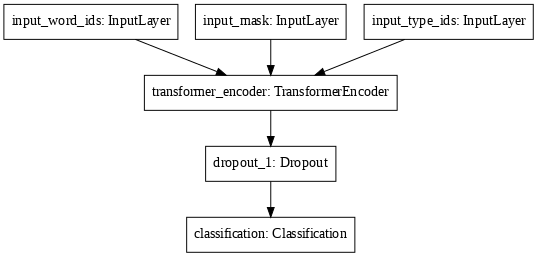

In [ ]:
tf.keras.utils.plot_model(bert_classifier, show_shapes=False, dpi=70)

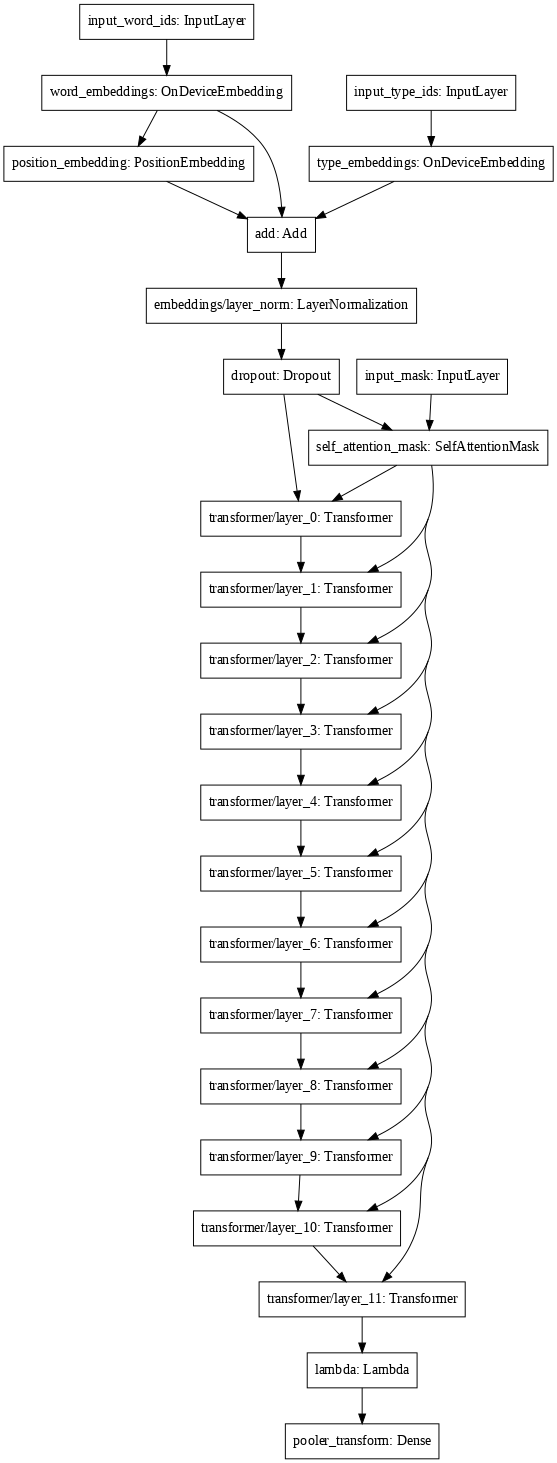

In [ ]:
tf.keras.utils.plot_model(bert_encoder, show_shapes=False, dpi=70)

In [ ]:
bert_classifier.summary()

Model: "bert_classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
transformer_encoder (Transforme [(None, None, 768),  109482240   input_word_ids[0][0]             
                                                                 input_mask[0][0]   

# **Train the model**

In [ ]:
# Restore the encoder's weights from the checkpoint
checkpoint = tf.train.Checkpoint(model=bert_encoder)
checkpoint.restore(
    os.path.join(gs_folder_bert, 'bert_model.ckpt')).assert_consumed()

In [ ]:
# Set up epochs and steps
# epoch = 2,3,4
# batch_size = 16, 32, 64
# learning rate = 5e-5, 3e-5, 4e-5, 2e-5

epochs = 3
batch_size = 16
eval_batch_size = 16

train_data_size = len(y_train)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

# creates an optimizer with learning rate schedule
optimizer = nlp.optimization.create_optimizer(
    3.9e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)



In [ ]:
with tpu_strategy.scope():
  metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy', dtype=tf.float32)]
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

  bert_classifier.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=metrics)

with tpu_strategy.scope():
  history = bert_classifier.fit(
      X_train_tokens, y_train,
      validation_data=(X_val_tokens, y_val),
      batch_size=16,
      epochs=epochs)

Epoch 1/3
2811/2811 [==============================] - 333s 118ms/step - loss: 0.2084 - accuracy: 0.9224 - val_loss: 0.0907 - val_accuracy: 0.9662
Epoch 2/3
2811/2811 [==============================] - 324s 115ms/step - loss: 0.0619 - accuracy: 0.9786 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 3/3
2811/2811 [==============================] - 327s 116ms/step - loss: 0.0147 - accuracy: 0.9958 - val_loss: 0.0172 - val_accuracy: 0.9946


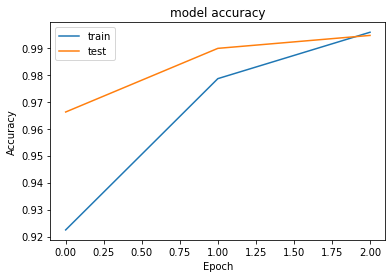

In [ ]:
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

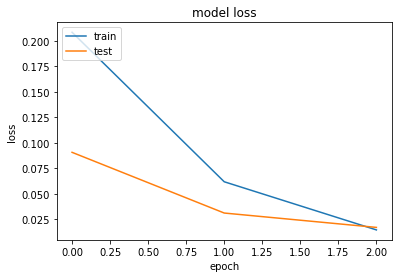

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# serialize model to JSON
bert_model = bert_classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(bert_model)
# serialize weights to HDF5
bert_classifier.save_weights("bert_model_weights.h5")
print("Saved model to disk")

Saved model to disk


# **Prediction**

In [ ]:
preds = bert_classifier.predict(X_test_tokens)

In [ ]:
y_test.replace('unrelated',0,True)
y_test.replace('agree',1,True)
y_test.replace('disagree',2,True)
y_test.replace('discuss',3,True)

In [ ]:
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(
    y_test, preds, sample_weight=None
)
print("Accuracy:{}".format(m.result().numpy()))

Accuracy:0.9319639801979065


In [ ]:
outputs = [np.argmax(p, axis = -1) for p in preds]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, outputs)

array([[18172,    18,    14,   145],
       [   27,  1190,    96,   590],
       [   37,   134,   276,   250],
       [   81,   261,    76,  4046]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, outputs)

0.9319639554558691

In [ ]:
for i in range(len(outputs)):
    if outputs[i] == 0: outputs[i] = "unrelated"
    if outputs[i] == 1: outputs[i] = "agree"
    if outputs[i] == 2: outputs[i] = "disagree"
    if outputs[i] == 3: outputs[i] = "discuss"
# save the prediction result
df_predicted = {}
df_predicted = pd.DataFrame({'Stance': outputs})
result = pd.concat([test_df[['Headline','Body ID']], df_predicted], axis=1, sort=False)
result.to_csv('./answer.csv', index=False, encoding='utf-8')

In [ ]:
#!/usr/local/env python
"""
Scorer for the Fake News Challenge
 - @bgalbraith

Submission is a CSV with the following fields: Headline, Body ID, Stance
where Stance is in {agree, disagree, discuss, unrelated}

Scoring is as follows:
  +0.25 for each correct unrelated
  +0.25 for each correct related (label is any of agree, disagree, discuss)
  +0.75 for each correct agree, disagree, discuss
"""
from __future__ import division
import csv
import sys


FIELDNAMES = ['Headline', 'Body ID', 'Stance']
LABELS = ['agree', 'disagree', 'discuss', 'unrelated']
RELATED = LABELS[0:3]

USAGE = """
FakeNewsChallenge FNC-1 scorer - version 1.0
Usage: python scorer.py gold_labels test_labels

  gold_labels - CSV file with reference GOLD stance labels
  test_labels - CSV file with predicted stance labels

The scorer will provide three scores: MAX, NULL, and TEST
  MAX  - the best possible score (100% accuracy)
  NULL - score as if all predicted stances were unrelated
  TEST - score based on the provided predictions
"""

ERROR_MISMATCH = """
ERROR: Entry mismatch at line {}
 [expected] Headline: {} // Body ID: {}
 [got] Headline: {} // Body ID: {}
"""

SCORE_REPORT = """
MAX  - the best possible score (100% accuracy)
NULL - score as if all predicted stances were unrelated
TEST - score based on the provided predictions

||    MAX    ||    NULL   ||    TEST   ||\n||{:^11}||{:^11}||{:^11}||
"""


class FNCException(Exception):
    pass


def score_submission(gold_labels, test_labels):
    score = 0.0
    cm = [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]

    for i, (g, t) in enumerate(zip(gold_labels, test_labels)):
        if g['Headline'] != t['Headline'] or g['Body ID'] != t['Body ID']:
            error = ERROR_MISMATCH.format(i+2,
                                          g['Headline'], g['Body ID'],
                                          t['Headline'], t['Body ID'])
            raise FNCException(error)
        else:
            g_stance, t_stance = g['Stance'], t['Stance']
            if g_stance == t_stance:
                score += 0.25
                if g_stance != 'unrelated':
                    score += 0.50
            if g_stance in RELATED and t_stance in RELATED:
                score += 0.25

        cm[LABELS.index(g_stance)][LABELS.index(t_stance)] += 1

    return score, cm


def score_defaults(gold_labels):
    """
    Compute the "all false" baseline (all labels as unrelated) and the max
    possible score
    :param gold_labels: list containing the true labels
    :return: (null_score, best_score)
    """
    unrelated = [g for g in gold_labels if g['Stance'] == 'unrelated']
    null_score = 0.25 * len(unrelated)
    max_score = null_score + (len(gold_labels) - len(unrelated))
    return null_score, max_score


def load_dataset(filename):
    data = None
    try:
        with open(filename) as fh:
            reader = csv.DictReader(fh)
            if reader.fieldnames != FIELDNAMES:
                error = 'ERROR: Incorrect headers in: {}'.format(filename)
                raise FNCException(error)
            else:
                data = list(reader)

            if data is None:
                error = 'ERROR: No data found in: {}'.format(filename)
                raise FNCException(error)
    except FileNotFoundError:
        error = "ERROR: Could not find file: {}".format(filename)
        raise FNCException(error)

    return data


def print_confusion_matrix(cm):
    lines = ['CONFUSION MATRIX:']
    header = "|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format('', *LABELS)
    line_len = len(header)
    lines.append("-"*line_len)
    lines.append(header)
    lines.append("-"*line_len)

    hit = 0
    total = 0
    for i, row in enumerate(cm):
        hit += row[i]
        total += sum(row)
        lines.append("|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format(LABELS[i],
                                                                   *row))
        lines.append("-"*line_len)
    lines.append("ACCURACY: {:.3f}".format(hit / total))
    print('\n'.join(lines))
    return hit/total

In [ ]:
gold_labels = load_dataset('answer.csv')
test_labels = load_dataset('competition_test_stances.csv')

test_score, cm = score_submission(gold_labels, test_labels)
null_score, max_score = score_defaults(gold_labels)
print_confusion_matrix(cm)
print(SCORE_REPORT.format(max_score, null_score, test_score))

CONFUSION MATRIX:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |   1190    |    134    |    261    |    18     |
-------------------------------------------------------------
| disagree  |    96     |    276    |    76     |    14     |
-------------------------------------------------------------
|  discuss  |    590    |    250    |   4046    |    145    |
-------------------------------------------------------------
| unrelated |    27     |    37     |    81     |   18172   |
-------------------------------------------------------------
ACCURACY: 0.932

MAX  - the best possible score (100% accuracy)
NULL - score as if all predicted stances were unrelated
TEST - score based on the provided predictions

||    MAX    ||    NULL   ||    TEST   ||
|| 11675.25  ||  4579.25  || 10406.75  ||

